In [41]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sb
import matplotlib.pyplot as plt

In [29]:
FLIGHTS_PATH = "/Users/akshar/Documents/2020-2021/HL_CS/delay_data/flights.csv"
AIRLINES_PATH = "/Users/akshar/Documents/2020-2021/HL_CS/delay_data/airlines.csv"
AIRPORTS_PATH = "/Users/akshar/Documents/2020-2021/HL_CS/delay_data/airports.csv"

In [27]:
flights_data = pd.read_csv(FLIGHTS_PATH)[:10000]
arlines_data = pd.read_csv(AIRLINES_PATH)

display (flights_data.head())

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# flights_data.drop(['YEAR','FLIGHT_NUMBER','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','ARRIVAL_TIME','CANCELLATION_REASON'],axis=1,inplace=True)
flights_data.fillna(flights_data.mean(), inplace=True)

In [5]:
print (flights_data.shape)

(10000, 17)


In [6]:
flights_data['DIVERTED'].value_counts()
flights_data['CANCELLED'].value_counts()

0    9608
1     392
Name: CANCELLED, dtype: int64

In [7]:
display (flights_data.head())

,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,1,AS,ANC,SEA,5,-11.0,169.0,430,-22.0,0,0,9.098958,0.140046,21.015625,15.4375,1.678241
1,1,1,AA,LAX,PBI,10,-8.0,263.0,750,-9.0,0,0,9.098958,0.140046,21.015625,15.4375,1.678241
2,1,1,US,SFO,CLT,20,-2.0,266.0,806,5.0,0,0,9.098958,0.140046,21.015625,15.4375,1.678241
3,1,1,AA,LAX,MIA,20,-5.0,258.0,805,-9.0,0,0,9.098958,0.140046,21.015625,15.4375,1.678241
4,1,1,AS,SEA,ANC,25,-1.0,199.0,320,-21.0,0,0,9.098958,0.140046,21.015625,15.4375,1.678241


In [8]:
flights_data['RESULT'] = flights_data['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 5 else 0)
flights_data.head()
flights_data['RESULT'].value_counts()

0    7251
1    2749
Name: RESULT, dtype: int64

In [24]:
y = flights_data.RESULT
X = flights_data.drop(['AIR_TIME','ARRIVAL_DELAY','ORIGIN_AIRPORT','DESTINATION_AIRPORT', 'AIRLINE'],axis=1)
X_NEW = X.iloc[:,:-1]
X_scaled = pd.DataFrame(normalize(scale(X_NEW)))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,-0.778470,-0.135132,-0.611258,-0.008610,-0.044869,7.054684e-17,0.0,0.0,0.0,-9.484659e-18
1,0.0,0.0,-0.876500,-0.127832,-0.461235,-0.009737,-0.050741,7.977935e-17,0.0,0.0,0.0,-1.072592e-17
2,0.0,0.0,-0.895732,-0.080275,-0.434031,-0.010038,-0.052314,8.225229e-17,0.0,0.0,0.0,-1.105840e-17
3,0.0,0.0,-0.893304,-0.105747,-0.433594,-0.010011,-0.052172,8.202935e-17,0.0,0.0,0.0,-1.102842e-17
4,0.0,0.0,-0.744696,-0.059866,-0.663223,-0.008383,-0.043687,6.868749e-17,0.0,0.0,0.0,-9.234678e-18


In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42,test_size=0.3)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('nca',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=None,
                                                random_state=42, tol=1e-05,
                                                verbose=0, warm_start=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [11]:
print(nca_pipe.score(X_test, y_test))

0.8866666666666667


# Modifying some weights

In [60]:
X_scaled[7] = 5 * X_scaled[7]
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,-0.778470,-0.135132,-0.611258,-0.008610,-0.044869,3.527342e-16,0.0,0.0,0.0,-9.484659e-18
1,0.0,0.0,-0.876500,-0.127832,-0.461235,-0.009737,-0.050741,3.988967e-16,0.0,0.0,0.0,-1.072592e-17
2,0.0,0.0,-0.895732,-0.080275,-0.434031,-0.010038,-0.052314,4.112615e-16,0.0,0.0,0.0,-1.105840e-17
3,0.0,0.0,-0.893304,-0.105747,-0.433594,-0.010011,-0.052172,4.101467e-16,0.0,0.0,0.0,-1.102842e-17
4,0.0,0.0,-0.744696,-0.059866,-0.663223,-0.008383,-0.043687,3.434374e-16,0.0,0.0,0.0,-9.234678e-18


In [61]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42,test_size=0.3)
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('nca',
                 NeighborhoodComponentsAnalysis(callback=None, init='auto',
                                                max_iter=50, n_components=None,
                                                random_state=42, tol=1e-05,
                                                verbose=0, warm_start=False)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [62]:
print(nca_pipe.score(X_test, y_test))

0.8866666666666667


# Data Visualization
Using seaborn and matplotlib for exploratory data analysis

In [30]:
flights_data = pd.read_csv(FLIGHTS_PATH)
arlines_data = pd.read_csv(AIRLINES_PATH)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


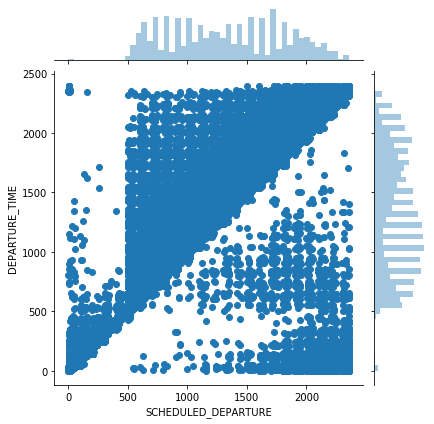

In [37]:
sb.jointplot(data=flights_data, x="SCHEDULED_DEPARTURE", y="DEPARTURE_TIME")

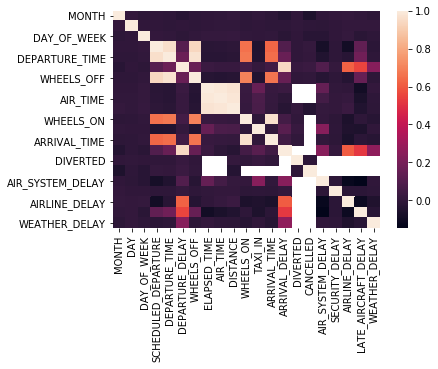

In [35]:
corr = flights_data.drop(['YEAR', 'FLIGHT_NUMBER', 'SCHEDULED_TIME', 'SCHEDULED_ARRIVAL', 'TAXI_OUT'], axis=1).corr(method='pearson')
sb.heatmap(corr)

In [36]:
flights_data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [58]:
%matplotlib inline

0         -11.0
1          -8.0
2          -2.0
3          -5.0
4          -1.0
           ... 
5819074    -4.0
5819075    -4.0
5819076    -9.0
5819077    -6.0
5819078    15.0
Name: DEPARTURE_DELAY, Length: 5819079, dtype: float64


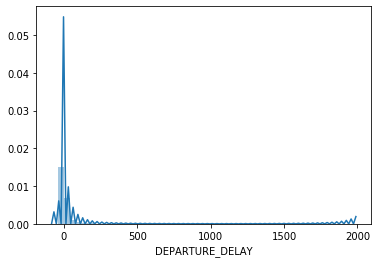

In [59]:
flights_data['DEPARTURE_DELAY'] = pd.to_numeric(flights_data['DEPARTURE_DELAY'], errors='coerce')
print (flights_data['DEPARTURE_DELAY'])
sb.distplot(flights_data['DEPARTURE_DELAY'])
plt.show()

In [69]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

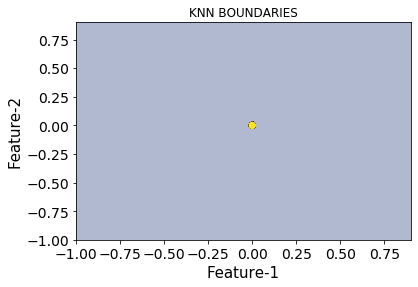

In [70]:
plt.figure()
plt.title("KNN BOUNDARIES")
plot_decision_boundaries(X_train, y_train, KNeighborsClassifier, n_neighbors=10)
plt.show()

In [16]:
#### Start of STEP 1
# Importing data
data = X[:-1]
#### End of STEP 1

print(data.head(5))

# Defining a function which calculates euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        print (x)
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# Defining our KNN model
def knn(trainingSet, testInstance, k):

    distances = {}
    sort = {}

    length = testInstance.shape[1]

    #### Start of STEP 3
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):

        #### Start of STEP 3.1
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)

        distances[x] = dist[0]
        #### End of STEP 3.1

    #### Start of STEP 3.2
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #### End of STEP 3.2

    neighbors = []

    #### Start of STEP 3.3
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    #### End of STEP 3.3
    classVotes = {}

    #### Start of STEP 3.4
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]

        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    #### End of STEP 3.4

    #### Start of STEP 3.5
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return(sortedVotes[0][0], neighbors)
    #### End of STEP 3.5


testSet = y
test = pd.DataFrame(testSet)

#### Start of STEP 2
# Setting number of neighbors = 1


print('\n\nWith 1 Nearest Neighbour \n\n')
k = 1
#### End of STEP 2
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted Class of the datapoint = ', result)

# Nearest neighbor
print('\nNearest Neighbour of the datapoints = ',neigh)


print('\n\nWith 3 Nearest Neighbours\n\n')
# Setting number of neighbors = 3
k = 3
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)

print('\n\nWith 5 Nearest Neighbours\n\n')
# Setting number of neighbors = 3
k = 5
# Running KNN model
result,neigh = knn(data, test, k)

# Predicted class
print('\nPredicted class of the datapoint = ',result)

# Nearest neighbor
print('\nNearest Neighbours of the datapoints = ',neigh)

   MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0      1    1                    5            -11.0                430   
1      1    1                   10             -8.0                750   
2      1    1                   20             -2.0                806   
3      1    1                   20             -5.0                805   
4      1    1                   25             -1.0                320   

   DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0         0          0          9.098958        0.140046      21.015625   
1         0          0          9.098958        0.140046      21.015625   
2         0          0          9.098958        0.140046      21.015625   
3         0          0          9.098958        0.140046      21.015625   
4         0          0          9.098958        0.140046      21.015625   

   LATE_AIRCRAFT_DELAY  WEATHER_DELAY  RESULT  
0              15.4375       1.678241       0  
1       

KeyError: 0